# Analysing IPL Cricket Data
We have the Indian Premier League data from 2008 to 2016. We have two files to begin with. 

Matches - giving us details of each match played. Deliveries - all the deliveries in all the matches put together. 

We would work on these two files to extract data on each match, batsmen and bowlers.

### Data Import and Pre-processing

In [268]:
import pandas as pd
# Set the option to display all columns
pd.set_option('display.max_columns', None)
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
sns.set_style('whitegrid')
import matplotlib.pyplot as plt        #For plotting graphs
%matplotlib inline                    
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
import gc
import datetime

In [269]:
# load the data
matches = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/matches.csv")
deliveries = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/deliveries.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [270]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [271]:
# shape
print(f'Matches_shape:{matches.shape}\nDeliveries-shape:{deliveries.shape}')

Matches_shape:(577, 18)
Deliveries-shape:(136598, 21)


In [272]:
#info
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               577 non-null    int64  
 1   season           577 non-null    int64  
 2   city             570 non-null    object 
 3   date             577 non-null    object 
 4   team1            577 non-null    object 
 5   team2            577 non-null    object 
 6   toss_winner      577 non-null    object 
 7   toss_decision    577 non-null    object 
 8   result           577 non-null    object 
 9   dl_applied       577 non-null    int64  
 10  winner           574 non-null    object 
 11  win_by_runs      577 non-null    int64  
 12  win_by_wickets   577 non-null    int64  
 13  player_of_match  574 non-null    object 
 14  venue            577 non-null    object 
 15  umpire1          577 non-null    object 
 16  umpire2          577 non-null    object 
 17  umpire3         

In [273]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136598 entries, 0 to 136597
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          136598 non-null  int64 
 1   inning            136598 non-null  int64 
 2   batting_team      136598 non-null  object
 3   bowling_team      136598 non-null  object
 4   over              136598 non-null  int64 
 5   ball              136598 non-null  int64 
 6   batsman           136598 non-null  object
 7   non_striker       136598 non-null  object
 8   bowler            136598 non-null  object
 9   is_super_over     136598 non-null  int64 
 10  wide_runs         136598 non-null  int64 
 11  bye_runs          136598 non-null  int64 
 12  legbye_runs       136598 non-null  int64 
 13  noball_runs       136598 non-null  int64 
 14  penalty_runs      136598 non-null  int64 
 15  batsman_runs      136598 non-null  int64 
 16  extra_runs        136598 non-null  int

In [274]:
# check missing values for each column 
matches.isnull().sum().sort_values(ascending=False)

umpire3            577
city                 7
winner               3
player_of_match      3
umpire2              0
umpire1              0
venue                0
win_by_wickets       0
win_by_runs          0
id                   0
season               0
result               0
toss_decision        0
toss_winner          0
team2                0
team1                0
date                 0
dl_applied           0
dtype: int64

In [275]:
# % of missing
(matches.isnull().mean()) * 100

id                   0.000000
season               0.000000
city                 1.213172
date                 0.000000
team1                0.000000
team2                0.000000
toss_winner          0.000000
toss_decision        0.000000
result               0.000000
dl_applied           0.000000
winner               0.519931
win_by_runs          0.000000
win_by_wickets       0.000000
player_of_match      0.519931
venue                0.000000
umpire1              0.000000
umpire2              0.000000
umpire3            100.000000
dtype: float64

In [276]:
# drop umpire 3
matches.drop('umpire3',axis=1,inplace=True)

In [277]:
# To check any duplicate rows
matches.duplicated().sum()


0

In [278]:
# check missing values for each column 
deliveries.isnull().sum().sort_values(ascending=False)

fielder             131727
dismissal_kind      129871
player_dismissed    129871
bye_runs                 0
total_runs               0
extra_runs               0
batsman_runs             0
penalty_runs             0
noball_runs              0
legbye_runs              0
match_id                 0
inning                   0
is_super_over            0
bowler                   0
non_striker              0
batsman                  0
ball                     0
over                     0
bowling_team             0
batting_team             0
wide_runs                0
dtype: int64

In [279]:
# % of missing
(deliveries.isnull().mean()) * 100

match_id             0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
is_super_over        0.000000
wide_runs            0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
player_dismissed    95.075331
dismissal_kind      95.075331
fielder             96.434062
dtype: float64

In [280]:
# drop player_dismissed, dismissal_kind ,fielder
deliveries.drop(['fielder'],axis=1,inplace=True)

In [281]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,1,1,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136593,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2,NaN,NaN
136594,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0,CJ Jordan,run out
136595,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN
136596,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN


In [282]:
# To check any duplicate rows
deliveries.duplicated().sum()

1

In [283]:
deliveries.drop_duplicates(inplace=True)

### Basic Statistical Details and Visualization

In [285]:
#numerical Columns
matches.describe().T

,count,mean,std,min,25%,50%,75%,max
id,577.0,289.000000,166.709828,1.0,145.0,289.0,433.0,577.0
season,577.0,2012.029463,2.486247,2008.0,2010.0,2012.0,2014.0,2016.0
dl_applied,577.0,0.025997,0.159263,0.0,0.0,0.0,0.0,1.0
win_by_runs,577.0,13.715771,23.619282,0.0,0.0,0.0,20.0,144.0
win_by_wickets,577.0,3.363951,3.416049,0.0,0.0,3.0,6.0,10.0


In [286]:
#Statistical Details of categorical Columns
str_cols=matches.select_dtypes("object").columns
matches[str_cols].describe().T

,count,unique,top,freq
city,570,30,Mumbai,77
date,577,407,2011-04-17,2
team1,577,13,Chennai Super Kings,77
team2,577,13,Royal Challengers Bangalore,77
toss_winner,577,13,Mumbai Indians,74
toss_decision,577,2,field,315
result,577,3,normal,568
winner,574,13,Mumbai Indians,80
player_of_match,574,187,CH Gayle,17
venue,577,35,M Chinnaswamy Stadium,58


In [287]:
#numerical Columns
deliveries.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,136597.0,288.565605,165.930119,1.0,145.0,289.0,432.0,577.0
inning,136597.0,1.482741,0.501576,1.0,1.0,1.0,2.0,4.0
over,136597.0,10.144630,5.673898,1.0,5.0,10.0,15.0,20.0
ball,136597.0,3.617144,1.808192,1.0,2.0,4.0,5.0,9.0
is_super_over,136597.0,0.000498,0.022306,0.0,0.0,0.0,0.0,1.0
wide_runs,136597.0,0.037783,0.260536,0.0,0.0,0.0,0.0,5.0
bye_runs,136597.0,0.004978,0.115512,0.0,0.0,0.0,0.0,4.0
legbye_runs,136597.0,0.022372,0.201310,0.0,0.0,0.0,0.0,5.0
noball_runs,136597.0,0.004480,0.074062,0.0,0.0,0.0,0.0,5.0
penalty_runs,136597.0,0.000073,0.019132,0.0,0.0,0.0,0.0,5.0


In [288]:
#Statistical Details of categorical Columns
str_cols=deliveries.select_dtypes("object").columns
deliveries[str_cols].describe().T

,count,unique,top,freq
batting_team,136597,13,Mumbai Indians,16889
bowling_team,136597,13,Mumbai Indians,16807
batsman,136597,436,V Kohli,3237
non_striker,136597,431,G Gambhir,3238
bowler,136597,334,Harbhajan Singh,2742
player_dismissed,6727,412,SK Raina,123
dismissal_kind,6727,9,caught,3954


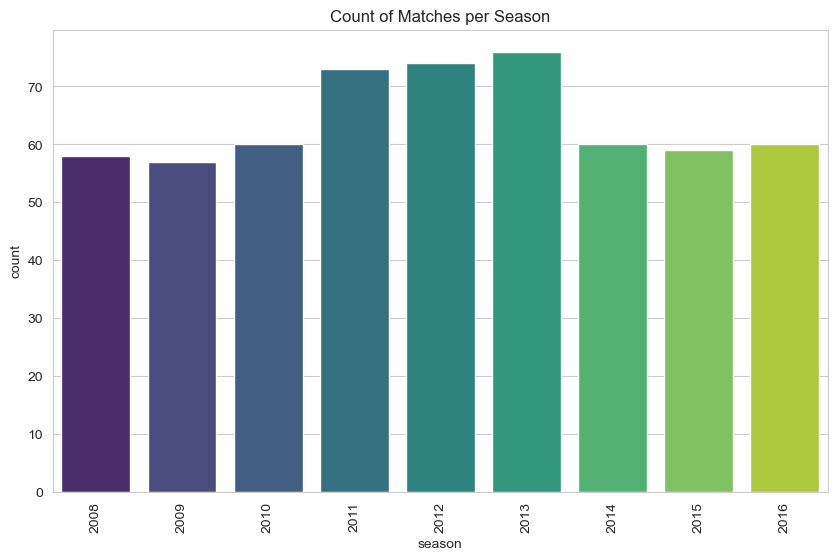

In [289]:
# Visualization 1: Count of matches per season
plt.figure(figsize=(10,6))
sns.countplot(data=matches, x='season', palette='viridis')
plt.title('Count of Matches per Season')
plt.xticks(rotation=90)
plt.show()

#### Key Findings and Analysis

#### Overview
This analysis examines the count of matches from 2008 to 2016.

#### Key Findings
1. **Growth (2008-2011):**
   - Steady increase in matches, peaking in 2011.

2. **Peak (2012-2013):**
   - Highest match counts, over 70 per season.

3. **Stabilization (2014-2016):**
   - Decline post-2013, stabilizing around 60 matches.

#### Analysis
- **Expansion:** Growth period suggests increased interest and participation.
- **Stabilization:** Post-2013 stability indicates a strategic or market-for future planning.

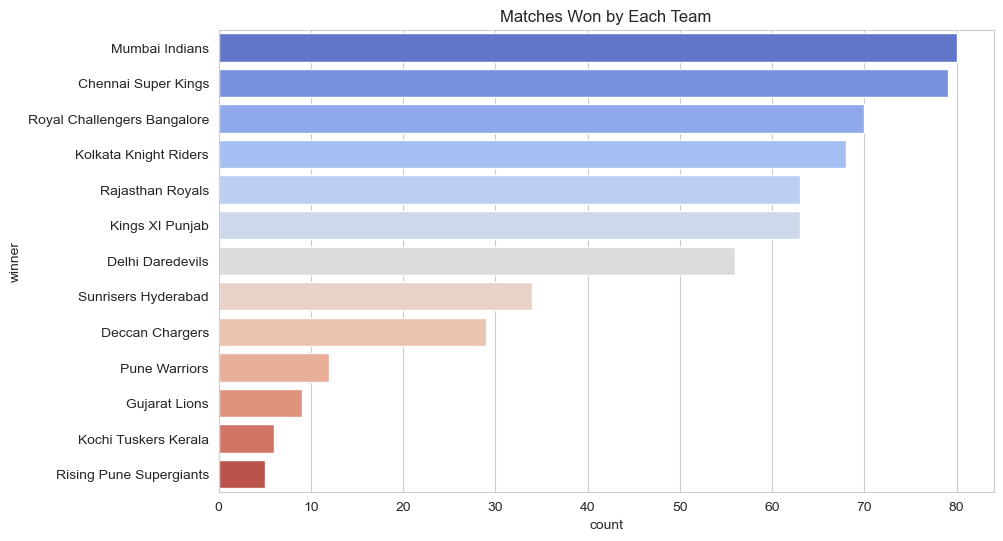

In [291]:
# Visualization 2: Matches won by each team
plt.figure(figsize=(10,6))
sns.countplot(data=matches, y='winner', order=matches['winner'].value_counts().index, palette='coolwarm')
plt.title('Matches Won by Each Team')
plt.show()

#### Key Findings and Analysis

#### Overview
The chart illustrates the number of matches won by each team, highlighting the competitive landscape.

#### Key Findings
1. **Top Performers:**
   - **Mumbai Indians** and **Chennai Super Kings** lead, each with over 80 wins.
   - **Royal Challengers Bangalore** and **Kolkata Knight Riders** follow closely with a strong performance.

2. **Mid-Tier Teams:**
   - **Rajasthan Royals** and **Kings XI Punjab** show competitive wins, indicating consistent performance.
   - **Delhi Daredevils** have a moderate win count, reflecting mixed results over the seasons.

3. **Lower Tier:**
   - **Sunrisers Hyderabad** and **Deccan Chargers** have fewer wins, indicating room for improvement.
   - Newer or now-defunct teams like **Pune Warriors**, **Gujarat Lions**, **Kochi Tuskers Rising Kerala**, and **Pune Supergiants** show lower win counts, likely due to fewer seasons of participation.

#### Analysis
- **Dominance:** Mumbai Indians and Chennai Super Kings have consistently been strong contenders, often reaching playoffs and finals.
- **Competitive Balance:** The mid-tier teams demonstrate a competitive league, with several teams capable of challenging the top performers.
- **Development Opportunities:** Lower-performing teams may focus on strategic changes and talent acquisition to enhats and competitive play.

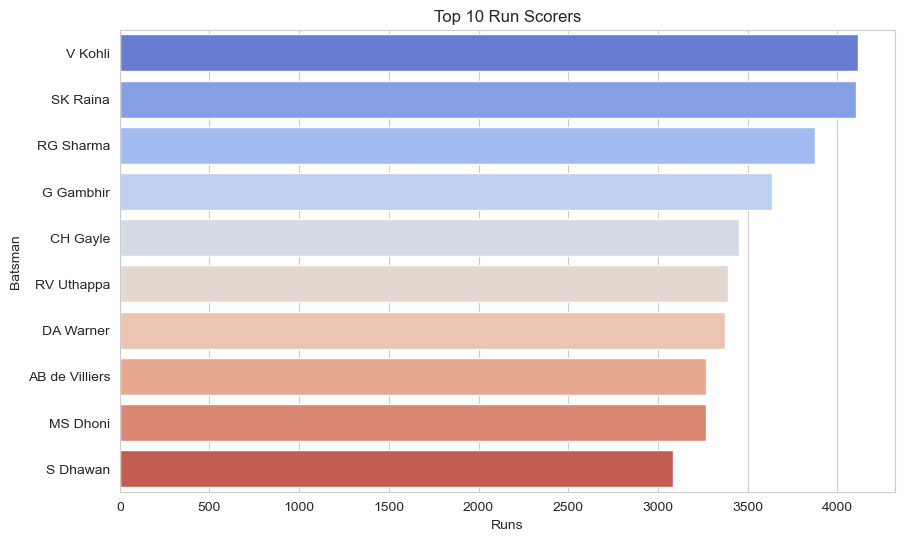

In [293]:
# Visualization 3: Top run scorers
top_run_scorers = deliveries.groupby('batsman')['batsman_runs'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_run_scorers, x='batsman_runs', y='batsman', palette='coolwarm')
plt.title('Top 10 Run Scorers')
plt.xlabel('Runs')
plt.ylabel('Batsman')
plt.savefig('1')
plt.show()

#### Key Findings and Analysis

#### Overview
This chart highlights the top 10 run scorers, providing insights into the performance of leading batsm
###
### Key Findings
1. **Top Scorer:**
   - **V Kohli** is the highest run scorer, demonstrating exceptional consistency.

2. **Consistent Performers:**
   - **SK Raina** and **RG Sharma** are close behind, showcasing sustained performance.
   - **G Gambhir** and **CH Gayle** also rank highly, known for their aggressive batting.

3. **Notable Contributors:**
   - **RV Uthappa**, **DA Warner**, and **AB de Villiers** are significant contributors to their teams' successes.
   - **MS Dhoni** and **S Dhawan** are known for their strategic and finishing ###abilities.

### Analysis
- **Dominance:** Kohli's lead reflects his dominance and ability to perform under pressure.
- **Depth of Talent:** The presence of multiple consistent performers indicates a strong depth of talent in the league.
- **Strategic Impact:** The mix of aggressive and strategic players highlightsoutcomes significantly.

In [295]:
# Aggregate metrics for batsmen
batsman_aggregates = deliveries.groupby('batsman').agg(
    runs=('batsman_runs', 'sum'),
    balls=('ball', 'count'),  # Count all deliveries faced (including non-scoring deliveries)
    fours=('batsman_runs', lambda x: (x == 4).sum()),  # Count number of 4s
    sixes=('batsman_runs', lambda x: (x == 6).sum())  # Count number of 6s
).reset_index()

# Calculate Strike Rate (SR) = (Runs / Balls) * 100
batsman_aggregates['strike_rate'] = (batsman_aggregates['runs'] / batsman_aggregates['balls']) * 100
batsman_aggregates.sort_values(by='runs', ascending=False,inplace=True)

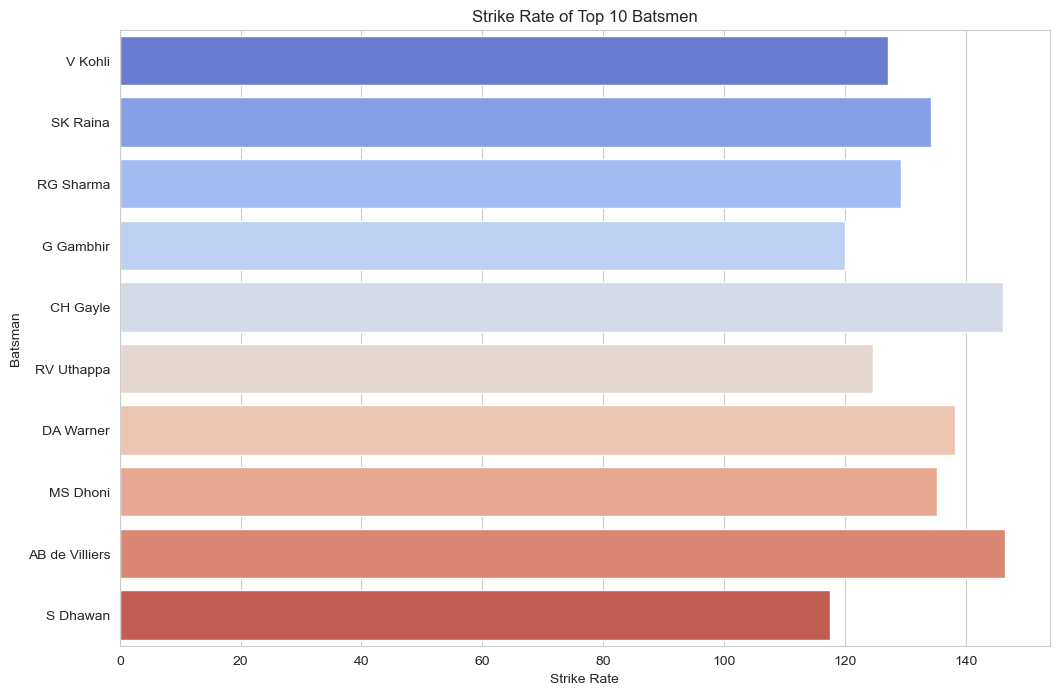

In [296]:
#  visualization_4: Strike Rate comparison for top batsmen
top_batsmen=batsman_aggregates.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_batsmen, x='strike_rate', y='batsman', palette='coolwarm')
plt.title('Strike Rate of Top 10 Batsmen')
plt.xlabel('Strike Rate')
plt.ylabel('Batsman')
plt.show()

#### Key Findings:

* **AB de Villiers** has the highest strike rate, indicating his aggressive batting style.
* **Virat Kohli, SK Raina, and RG Sharma** have consistent strike rates above 120.
* **CH Gayle and AB de Villiers** are explosive openers with strike rates exceeding 140.
* **MS Dhoni** maintains a balanced approach with a moderate strike rate.

In [298]:
# Grouping data to get wins by team, season, and city
wins_by_team_season_city = matches.groupby(['season', 'city', 'winner']).size().reset_index(name='win_count')
wins_by_team_season_city.city.nunique


<bound method IndexOpsMixin.nunique of 0          Bangalore
1          Bangalore
2          Bangalore
3          Bangalore
4          Bangalore
           ...      
347           Rajkot
348    Visakhapatnam
349    Visakhapatnam
350    Visakhapatnam
351    Visakhapatnam
Name: city, Length: 352, dtype: object>

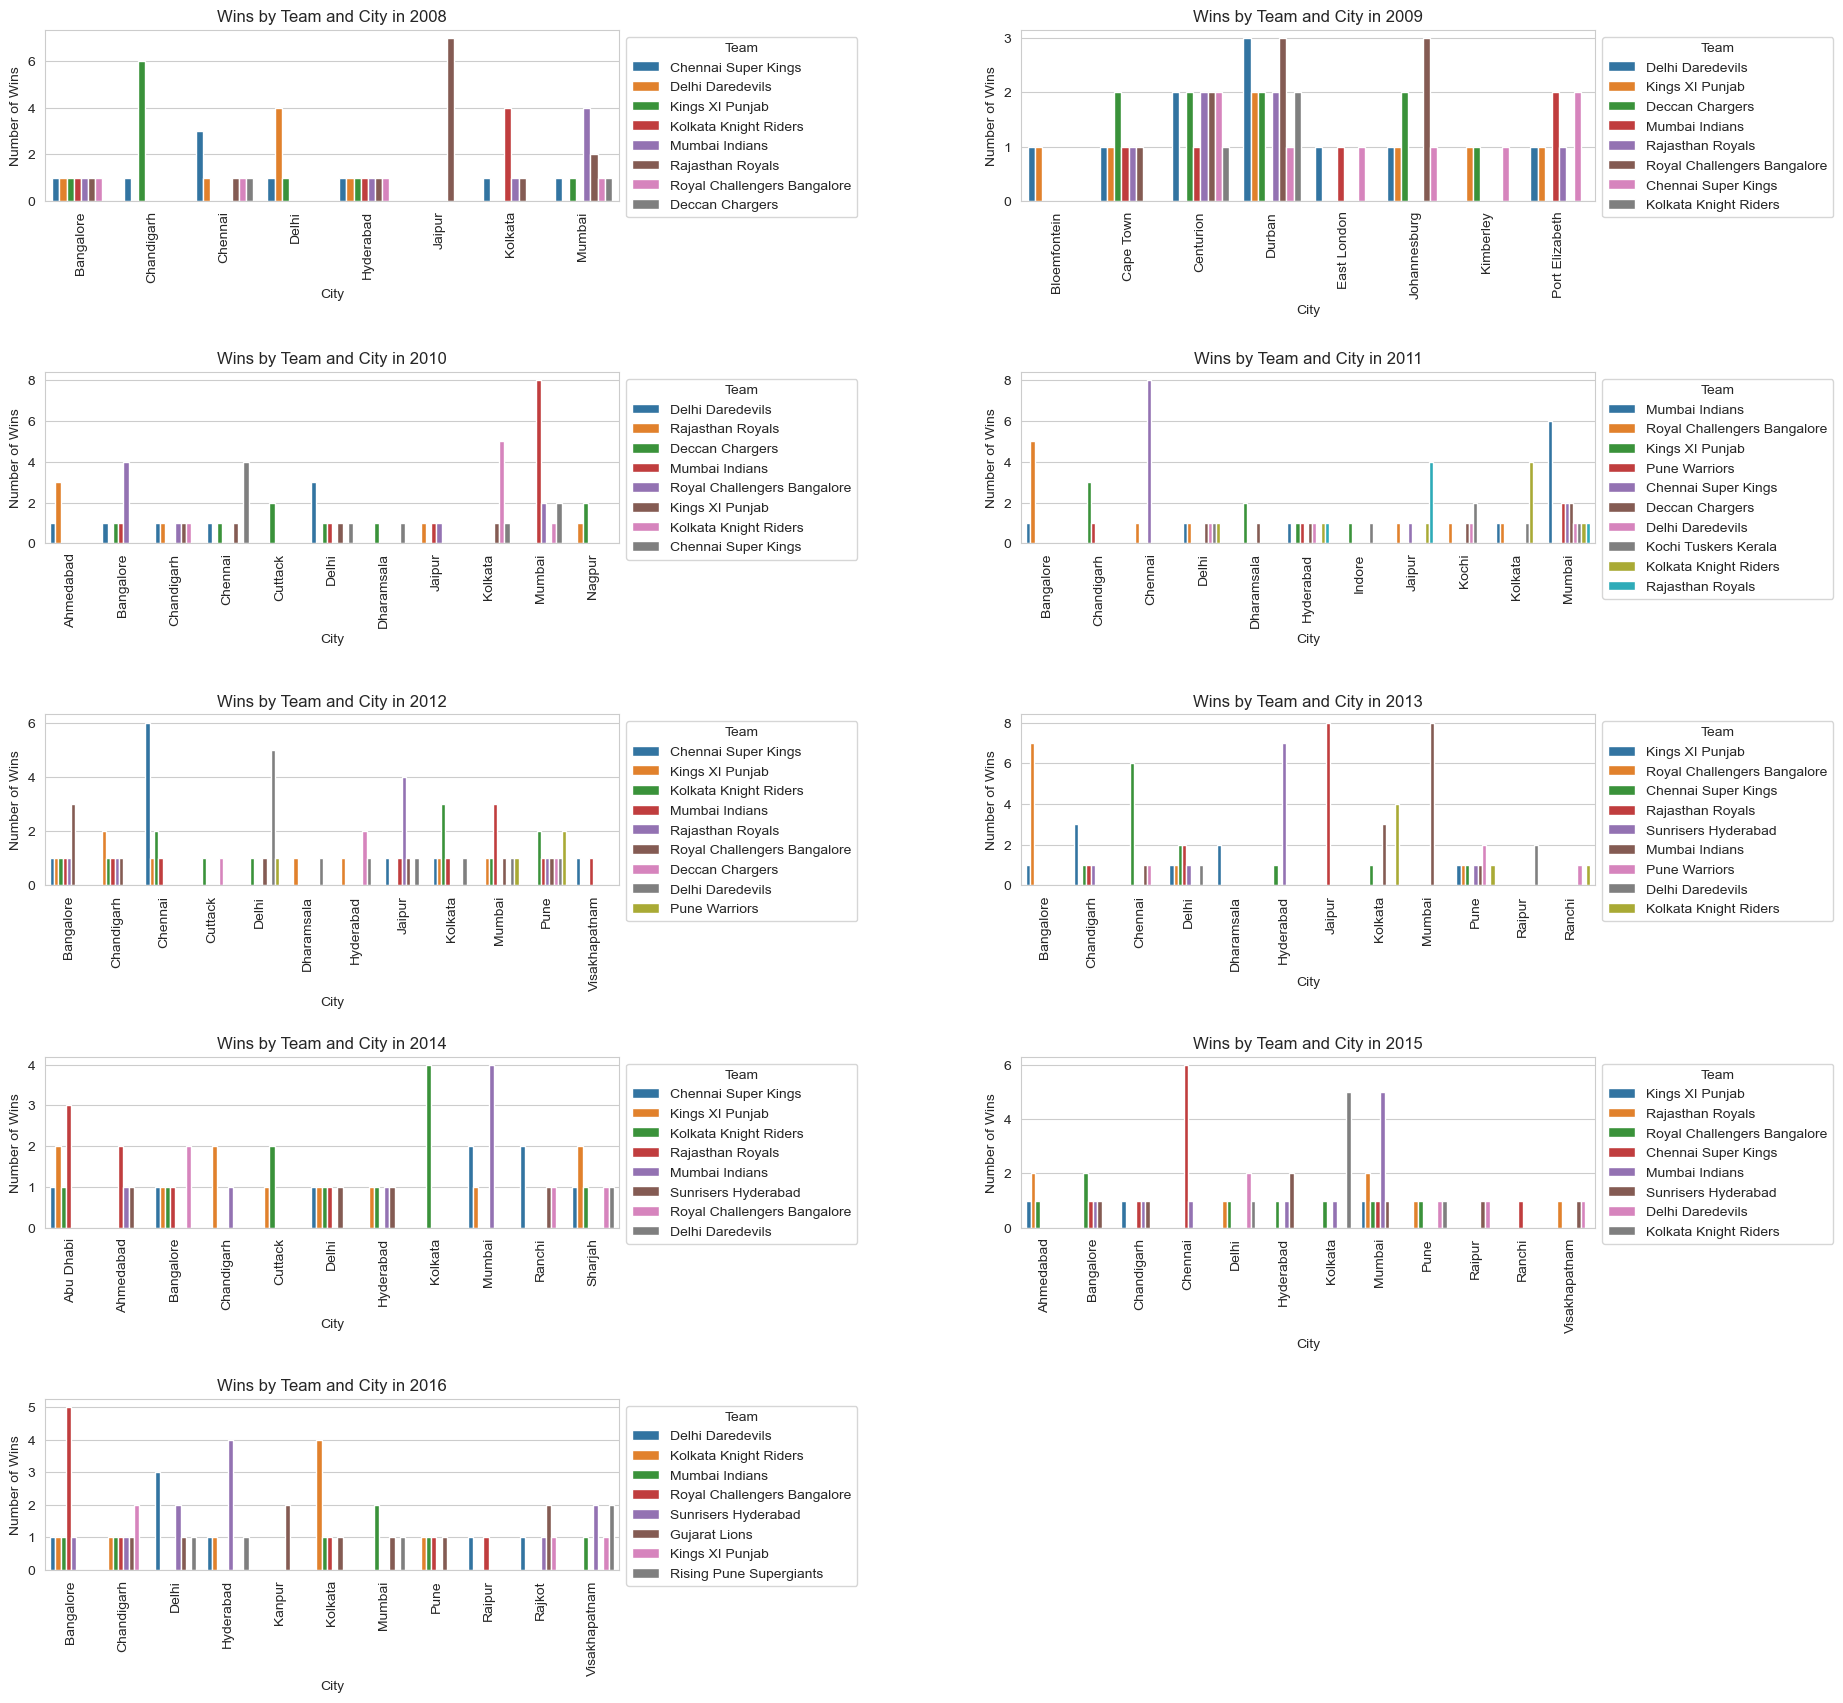

In [299]:
# Visualization_5: Grouped Barplot for Wins by Team, Season, and City
# Grouping data to get wins by team, season, and city
wins_by_team_season_city = matches.groupby(['season', 'city', 'winner']).size().reset_index(name='win_count')

# Get the unique seasons
seasons = wins_by_team_season_city['season'].unique()

# Set up subplots - assume there are 10 seasons, so we'll create a 5x2 grid
plt.figure(figsize=(20, 20))
count = 1  # to track subplot position

for season in seasons:
    # Filter the data for the current season
    season_data = wins_by_team_season_city[wins_by_team_season_city['season'] == season]
    
    # Create a subplot for this season
    plt.subplot(5, 2, count)
    
    # Barplot with city and winner combined as the x-axis
    sns.barplot(data=season_data, x='city', y='win_count',hue='winner')
    
    # Customizing each subplot
    plt.title(f'Wins by Team and City in {season}')
    plt.xlabel('City')
    plt.ylabel('Number of Wins')
    plt.legend(title='Team', bbox_to_anchor=(1, 1), loc='upper left')
    plt.xticks(rotation=90)
    
    # Move to the next subplot
    count += 1

# Adjust layout to avoid overlapping
plt.subplots_adjust(wspace=0.7,hspace=1)
plt.show()



#### Key Findings:

* **Consistent Dominance:** Mumbai Indians, Kings X1 Punjab and Chennai Super Kings have consistently performed well across multiple seasons and cities.
* **Home Advantage:** There are instances of teams performing better in their home cities.
* **City-Specific Success:** Certain cities have witnessed success from multiple teams.
* **Team Fluctuations:** Some teams experience varying levels of success across different seasons.

In [301]:
#  Merge deliveries with matches to include the season
merged_data = pd.merge(deliveries, matches, left_on='match_id', right_on='id')
merged_data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,1,0,0,0,0,0,1,1,NaN,NaN,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,0,0,0,0,NaN,NaN,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136592,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2,NaN,NaN,577,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
136593,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0,CJ Jordan,run out,577,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
136594,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,577,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
136595,577,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,577,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford


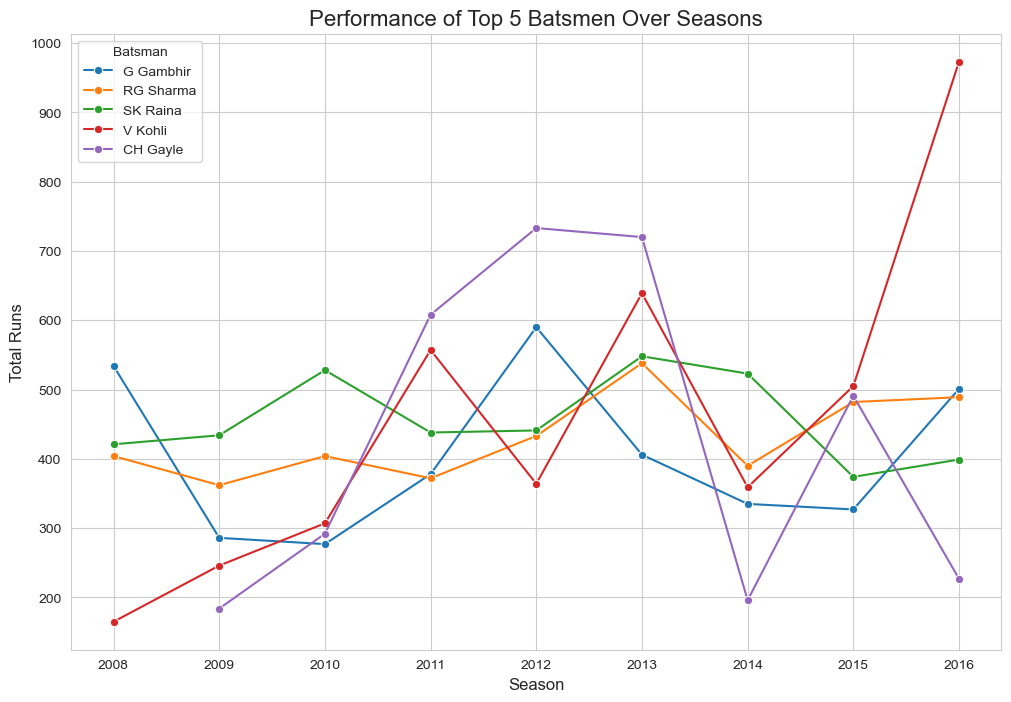

In [302]:
#visualization-6
#  Identify the top 5 batsmen based on total runs
top_batsmen = merged_data.groupby('batsman')['batsman_runs'].sum().nlargest(5).index

#  Filter the deliveries data for only the top 5 batsmen
top_batsmen_data = merged_data[merged_data['batsman'].isin(top_batsmen)]

#  Group by season and batsman to calculate total runs in each season
batsmen_performance = top_batsmen_data.groupby(['season', 'batsman'])['batsman_runs'].sum().reset_index()

#  Plot using seaborn's lineplot for each batsman over the seasons
plt.figure(figsize=(12, 8))

sns.lineplot(data=batsmen_performance, x='season', y='batsman_runs', hue='batsman', marker='o')

# Customizing the plot
plt.title('Performance of Top 5 Batsmen Over Seasons', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.legend(title='Batsman')
#plt.savefig('1')
plt.show()

#### Key Findings:

* **Virat Kohli** is the most consistent performer, scoring consistently high runs.
* **G Gambhir and SK Raina** have experienced fluctuations in performance.
* **CH Gayle** has shown glimpses of exceptional performance.
* **The league is competitive,** with different batsmen stepping up in different seasons.

In [304]:
merged_data.columns


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'id', 'season', 'city', 'date', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner',
       'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1',
       'umpire2'],
      dtype='object')

In [350]:
 # Aggregate bowler performance
# Group by season and bowler, then sum runs and count wickets
bowlers_performance = merged_data.groupby(['bowler']).agg(runs_given=('batsman_runs', 'sum'), wickets_taken=('player_dismissed', lambda x: x.notnull().sum())).reset_index()
bowlers_performance.sort_values('wickets_taken',ascending=False,inplace=True)
bowlers_performance

,bowler,runs_given,wickets_taken
276,SL Malinga,2407,159
80,DJ Bravo,2658,137
4,A Mishra,2852,132
109,Harbhajan Singh,3030,128
214,PP Chawla,3021,127
...,...,...,...
303,Swapnil Singh,29,0
172,M Vijay,48,0
246,RW Price,33,0
144,KAJ Roach,76,0


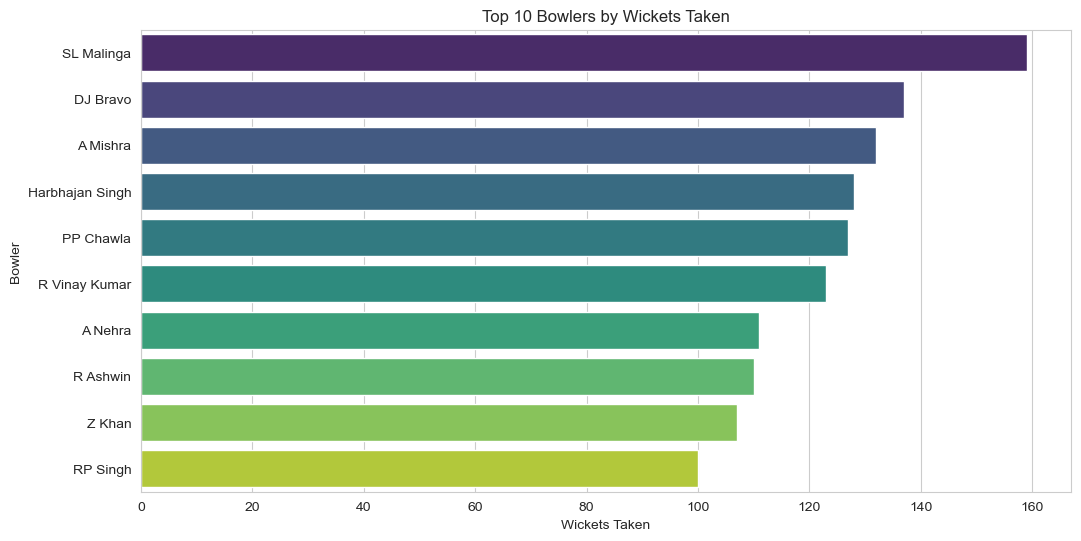

In [354]:
#visualization-7
plt.figure(figsize=(12, 6))
sns.barplot(data=bowlers_performance.head(10), x='wickets_taken', y='bowler', palette='viridis')
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')
plt.savefig('1')
plt.show()

#### Key Findings:

* **SL Malinga Dominates:** SL Malinga leads the list with the highest number of wickets taken, showcasing his exceptional bowling skills and consistency.
* **Spinner Dominance:** Several spinners, including  **A Mishra, Harbhajan Singh, PP Chawla, and R Ashwin**, feature in the top 10, highlighting the effectiveness of spin bowling in the competition.
* **Diverse Skillsets:** The chart includes bowlers with varying styles and strengths, demonstrating the importance of a balanced bowling attack.


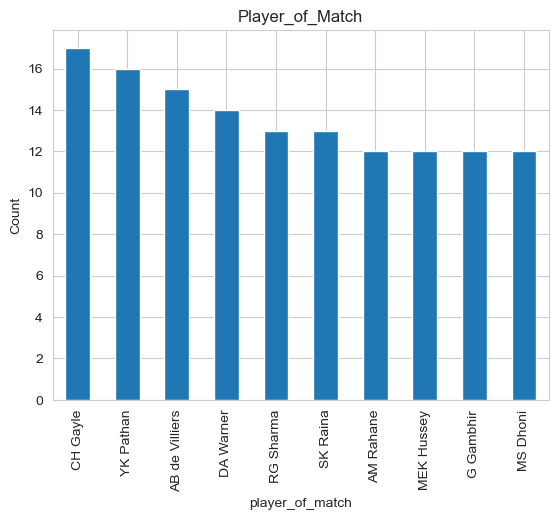

In [364]:
# Player of the match
matches['player_of_match'].value_counts()[:10].plot(kind = 'bar')
plt.title('Player_of_Match')
plt.ylabel('Count')
plt.savefig('1')

#### Key Findings:
* **Chris Gayle Dominates:** Chris Gayle stands out as the most frequent recipient of the "Player of the Match" award, significantly surpassing the other batsmen.
* **Consistent Performers:** Several batsmen, including **AB de Villiers, DA Warner, and RG Sharma**, have consistently been recognized for their outstanding performances.
* **Diverse Skillsets:** The chart includes players with varying roles and strengths, showcasing the importance of all-round contributions in winning matches.

In [389]:
# Impact of toss on the match outcome

toss_data = matches.groupby(['season', 'toss_winner','winner']).agg(Count=('toss_winner','count')).reset_index()
toss_data

,season,toss_winner,winner,Count
0,2008,Chennai Super Kings,Chennai Super Kings,3
1,2008,Chennai Super Kings,Delhi Daredevils,1
2,2008,Chennai Super Kings,Rajasthan Royals,1
3,2008,Deccan Chargers,Chennai Super Kings,1
4,2008,Deccan Chargers,Deccan Chargers,2
...,...,...,...,...
313,2016,Royal Challengers Bangalore,Royal Challengers Bangalore,4
314,2016,Royal Challengers Bangalore,Sunrisers Hyderabad,1
315,2016,Sunrisers Hyderabad,Kolkata Knight Riders,2
316,2016,Sunrisers Hyderabad,Royal Challengers Bangalore,1


In [395]:
toss_data['result'] = np.where(toss_data.toss_winner == toss_data.winner, 'won', 'lost')
toss_data

,season,toss_winner,winner,Count,result
0,2008,Chennai Super Kings,Chennai Super Kings,3,won
1,2008,Chennai Super Kings,Delhi Daredevils,1,lost
2,2008,Chennai Super Kings,Rajasthan Royals,1,lost
3,2008,Deccan Chargers,Chennai Super Kings,1,lost
4,2008,Deccan Chargers,Deccan Chargers,2,won
...,...,...,...,...,...
313,2016,Royal Challengers Bangalore,Royal Challengers Bangalore,4,won
314,2016,Royal Challengers Bangalore,Sunrisers Hyderabad,1,lost
315,2016,Sunrisers Hyderabad,Kolkata Knight Riders,2,lost
316,2016,Sunrisers Hyderabad,Royal Challengers Bangalore,1,lost


In [405]:
toss_result = toss_data.groupby(['season', 'toss_winner','result'])['result'].value_counts().reset_index()
toss_result

,season,toss_winner,result,count
0,2008,Chennai Super Kings,lost,2
1,2008,Chennai Super Kings,won,1
2,2008,Deccan Chargers,lost,5
3,2008,Deccan Chargers,won,1
4,2008,Delhi Daredevils,lost,3
...,...,...,...,...
142,2016,Rising Pune Supergiants,won,1
143,2016,Royal Challengers Bangalore,lost,2
144,2016,Royal Challengers Bangalore,won,1
145,2016,Sunrisers Hyderabad,lost,2


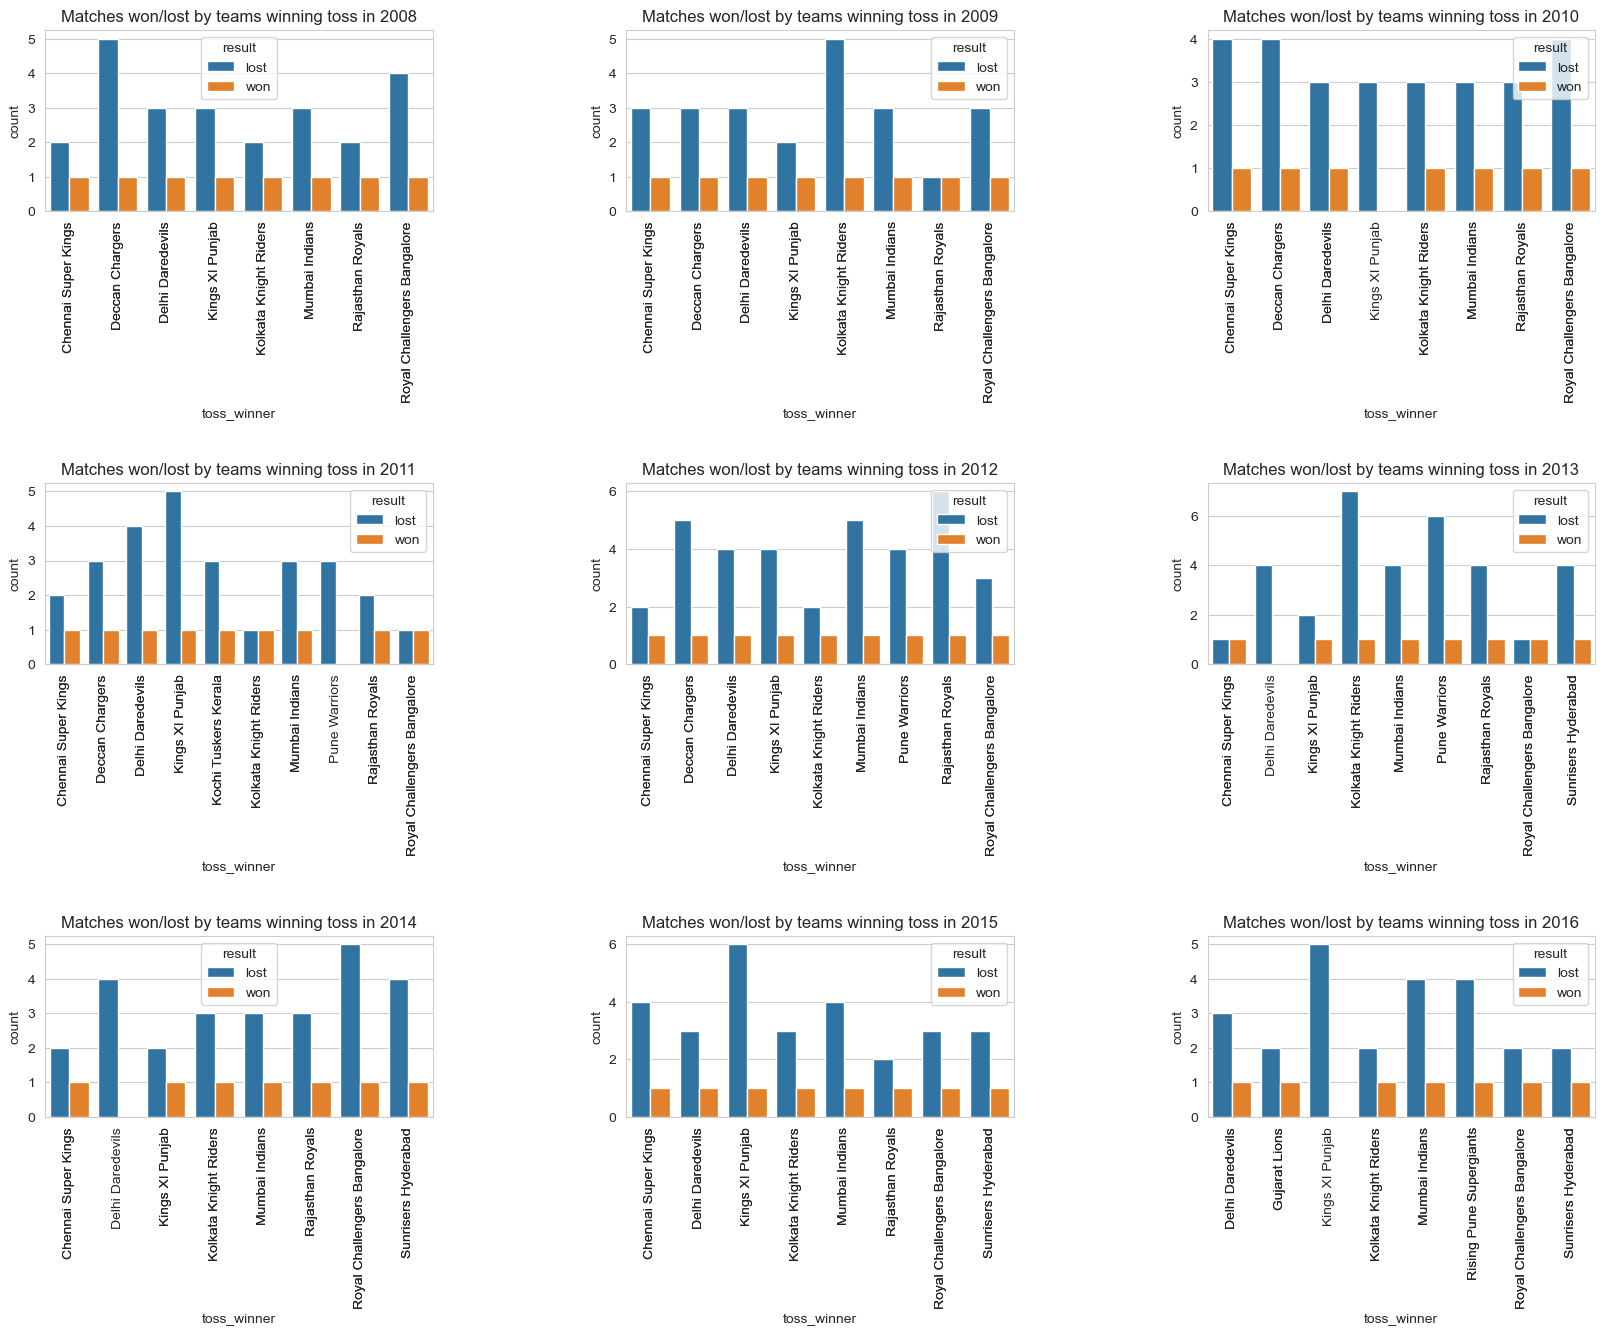

In [423]:
#visualization
plt.figure(figsize=(20,20))
count=1
for x in range(2008, 2017, 1):
    toss_result_x = toss_result[toss_result['season'] == x]
    plt.subplot(4,3,count)
    sns.barplot(x="toss_winner", y="count", hue="result", data=toss_result_x)
    plt.title(f'Matches won/lost by teams winning toss in {x}')
    plt.xticks(toss_result_x['toss_winner'],rotation=90)
    count+=1	
# Adjust space between subplots
plt.subplots_adjust(wspace=0.5, hspace=1.5)  # Adjust as needed
plt.show()

#### Key Findings:

* **Toss Advantage:** Teams winning the toss generally have a slight advantage.
* **Team-Specific Variations:** Individual teams may experience varying levels of success or failure.
* **Changing Dynamics:** The impact of winning the toss may have evolved over time.

In [430]:
# top winners on each season
winner_df=matches.groupby('season')['winner'].value_counts().reset_index()
winner_df

,season,winner,count
0,2008,Rajasthan Royals,13
1,2008,Kings XI Punjab,10
2,2008,Chennai Super Kings,9
3,2008,Delhi Daredevils,7
4,2008,Mumbai Indians,7
...,...,...,...
71,2016,Kolkata Knight Riders,8
72,2016,Delhi Daredevils,7
73,2016,Mumbai Indians,7
74,2016,Rising Pune Supergiants,5


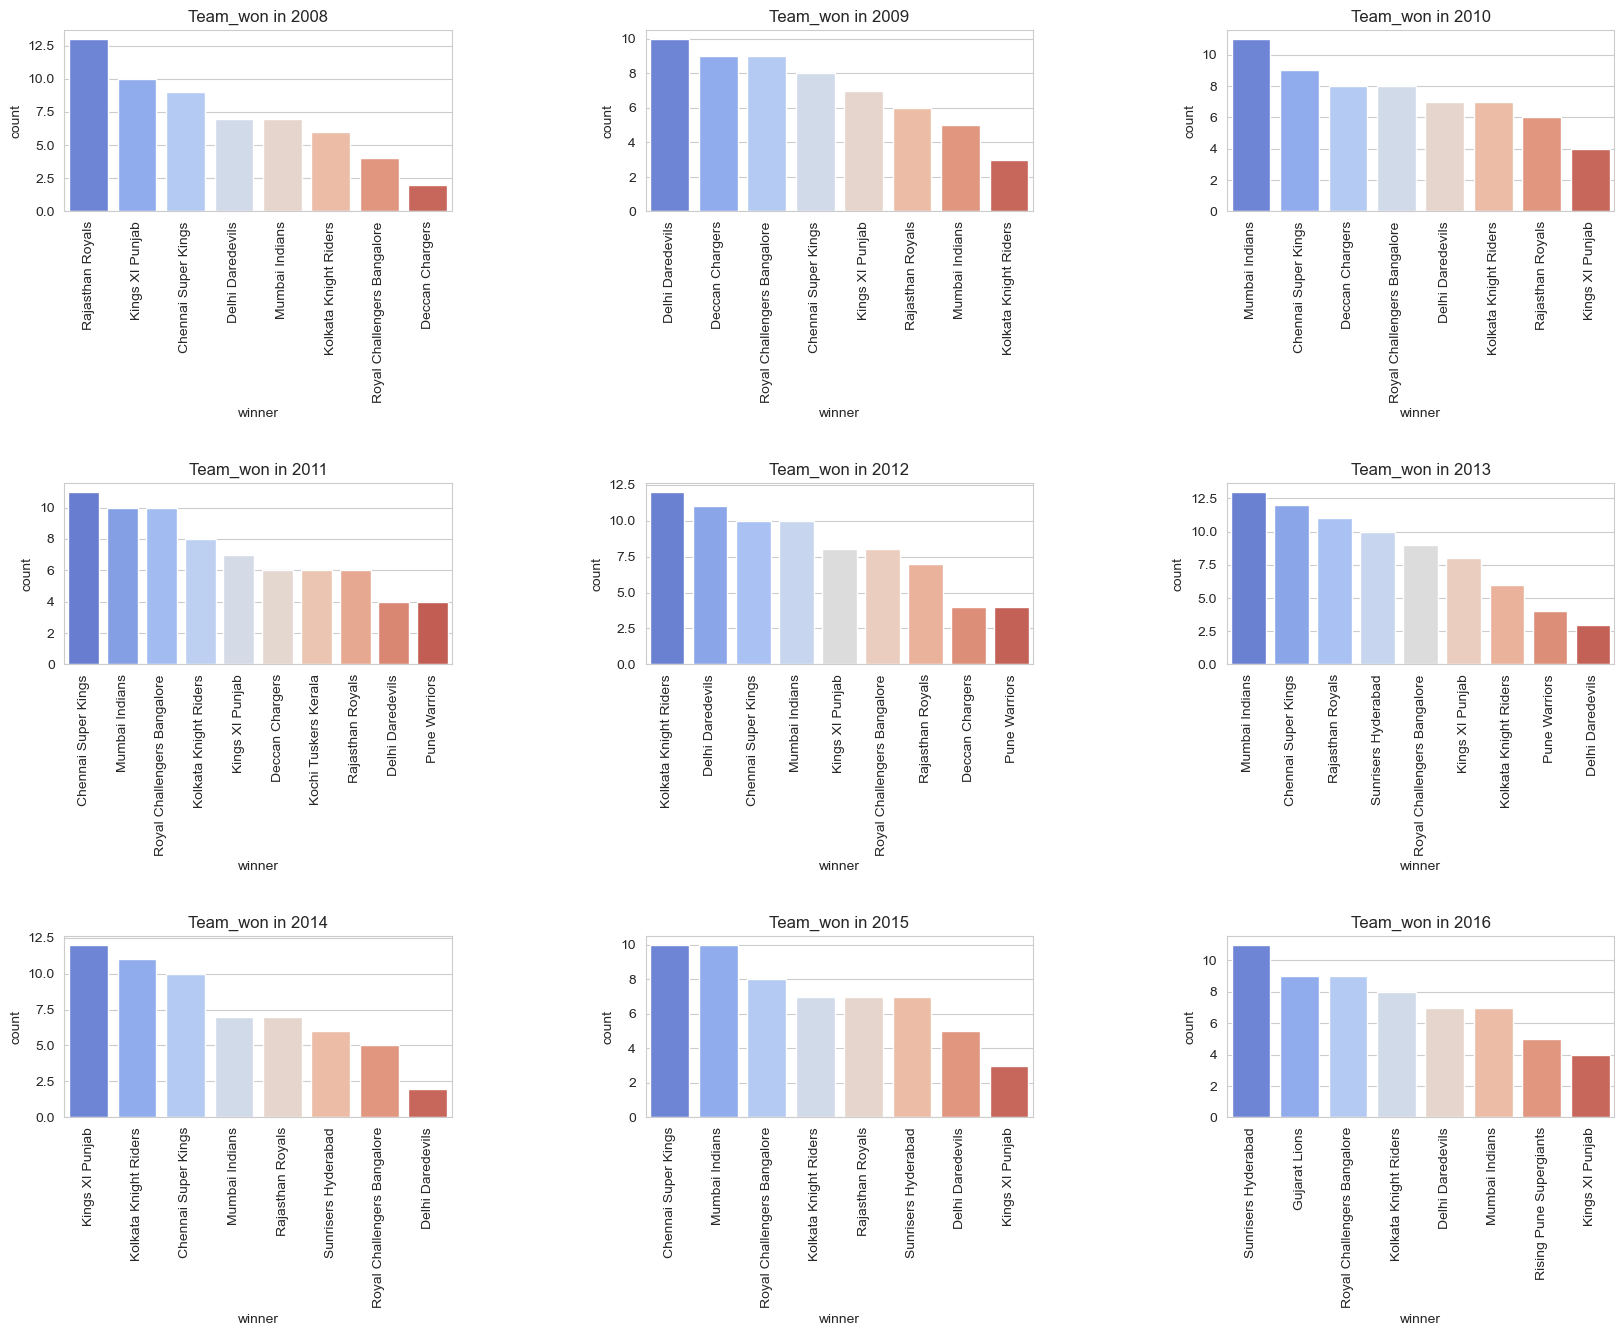

In [436]:
#visualization
plt.figure(figsize=(20,20))
count=1
for x in range(2008, 2017, 1):
    winner_x = winner_df[winner_df['season'] == x]
    plt.subplot(4,3,count)
    sns.barplot(x="winner", y="count", data=winner_x,palette='coolwarm')
    plt.title(f'Team_won in {x}')
    plt.xticks(winner_x['winner'],rotation=90)
    count+=1	
# Adjust space between subplots
plt.subplots_adjust(wspace=0.5, hspace=1.5)  # Adjust as needed
plt.savefig('1')
plt.show()

#### Key Findings:
#### Overall Performance:
* **Chennai Super Kings:** This team consistently performed well throughout the years, winning multiple titles.
* **Mumbai Indians:** Another strong contender, winning multiple titles and consistently finishing in the top positions.
* **Kolkata Knight Riders:** A consistent performer, though not as dominant as Chennai Super Kings or Mumbai Indians.
* **Royal Challengers Bangalore:** While they have had some strong seasons, they haven't been as consistent as the top teams.

#### Team Fluctuations:
* **Kings XI Punjab:** Experienced significant fluctuations in performance, with some years seeing them at the top and others at the bottom.
* **Delhi Daredevils:** Similar to Kings XI Punjab, their performance has been inconsistent.
* **Sunrisers Hyderabad:** A relatively new team, but they have shown promise with some strong performances.

--------------------------------------------------------------------------------------------------------------------------------------